In [147]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


In [148]:
fuzzy_set = {
    'daewoo': 8,
    'volkswagen': 1,
    'audi': 2,
    'bmw': 3,
    'tesla': 9
}

set_n = len(fuzzy_set)
f_set = pd.Series(fuzzy_set)
print(f_set.to_string())


daewoo        8
volkswagen    1
audi          2
bmw           3
tesla         9


In [149]:
comp_matrix = np.eye(set_n)
comp_matrix[set_n-1] = f_set.to_numpy()
comp_matrix

array([[1., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 1., 0.],
       [8., 1., 2., 3., 9.]])

In [150]:
for i in reversed(range(set_n-1)):
    for j in range(i):
        comp_matrix[i][j] = comp_matrix[i+1][j] / comp_matrix[i+1][i]
for i in range(set_n):
    for j in range(set_n):
        if j > i:
            comp_matrix[i][j] = 1 / comp_matrix[j][i]

comp_matrix


array([[1.        , 0.125     , 0.25      , 0.375     , 0.125     ],
       [8.        , 1.        , 2.        , 3.        , 1.        ],
       [4.        , 0.5       , 1.        , 1.5       , 0.5       ],
       [2.66666667, 0.33333333, 0.66666667, 1.        , 0.33333333],
       [8.        , 1.        , 2.        , 3.        , 9.        ]])

              daewoo  volkswagen      audi    bmw     tesla
daewoo      1.000000    0.125000  0.250000  0.375  0.125000
volkswagen  8.000000    1.000000  2.000000  3.000  1.000000
audi        4.000000    0.500000  1.000000  1.500  0.500000
bmw         2.666667    0.333333  0.666667  1.000  0.333333
tesla       8.000000    1.000000  2.000000  3.000  9.000000


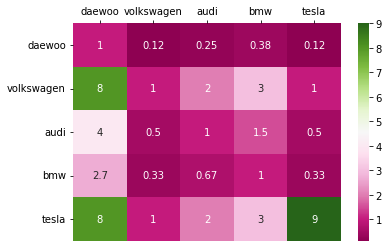

In [151]:
table = pd.DataFrame(
    comp_matrix,
    index=fuzzy_set.keys(),
    columns=fuzzy_set.keys()
)

print(table)

ax = sns.heatmap(table, cmap='PiYG', annot=True)
ax.xaxis.tick_top()  # x axis on top


In [152]:
column_sums = table.sum(axis=0).to_numpy()
column_sums_inv = np.array([1/item for item in column_sums])
max_item = column_sums_inv.max()
m_x = np.array([item/max_item for item in column_sums_inv])
table_2 = pd.DataFrame({
    '1 row': column_sums,
    '2 row': column_sums_inv,
    'M(x)': m_x
})
table_2 = table_2.transpose()
table_2.columns = fuzzy_set.keys()
table = pd.concat([table, table_2])
table


,daewoo,volkswagen,audi,bmw,tesla
daewoo,1.000000,0.125000,0.250000,0.375000,0.125000
volkswagen,8.000000,1.000000,2.000000,3.000000,1.000000
audi,4.000000,0.500000,1.000000,1.500000,0.500000
bmw,2.666667,0.333333,0.666667,1.000000,0.333333
tesla,8.000000,1.000000,2.000000,3.000000,9.000000
1 row,23.666667,2.958333,5.916667,8.875000,10.958333
2 row,0.042254,0.338028,0.169014,0.112676,0.091255
M(x),0.125000,1.000000,0.500000,0.333333,0.269962


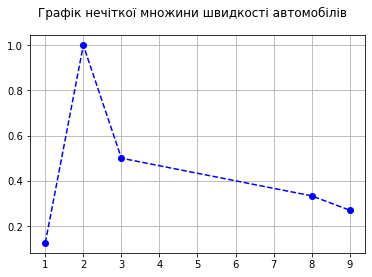

In [153]:
plt.plot(sorted(fuzzy_set.values()), table.iloc[7], '--ob')
plt.suptitle('Графік нечіткої множини швидкості автомобілів')
plt.grid(True)
